In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn import datasets, decomposition, ensemble, model_selection, neighbors

In [5]:
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

In [7]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary_r')


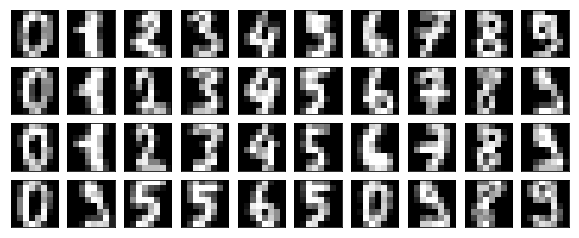

In [8]:
plot_digits(digits.data)

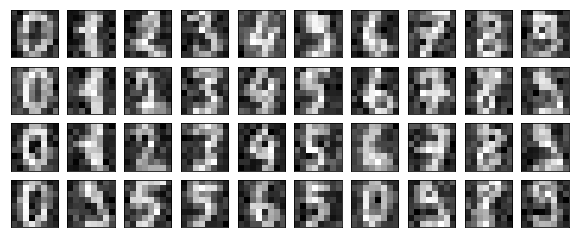

In [9]:
# 为数据数据加上噪音
np.random.RandomState(42)
# 两个参数 分别指定数据集 和抽取出来的正态分布的方差
noisy = np.random.normal(digits.data, 2)
plot_digits(noisy)

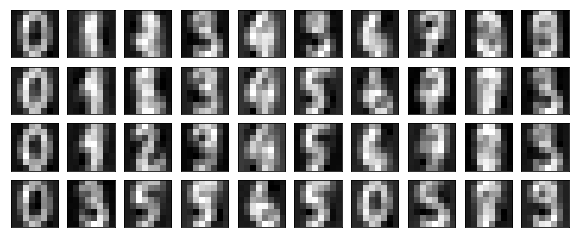

In [10]:
# 降维
pca = decomposition.PCA(0.5).fit(noisy)
x_dir = pca.transform(noisy)
# 逆转降维后实现降噪
without_noise = pca.inverse_transform(x_dir)
plot_digits(without_noise)


In [12]:
# demo： pca对手写数字数据集的降维
data = pd.read_csv('./data/digit recognizor.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [14]:
x.shape

(42000, 784)

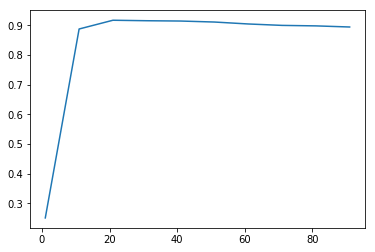

In [15]:
# 降维后的学习曲线
scores = []
for i in range(1, 101, 10):
    pca = decomposition.PCA(i).fit_transform(x)
    rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=66)
    score_mean = model_selection.cross_val_score(rfc, pca, y, cv=5).mean()
    scores.append(score_mean)
plt.plot(range(1, 101, 10), scores)
plt.show()

0.9183813466915265 23


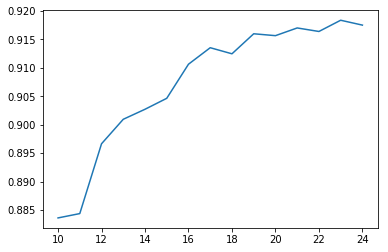

In [17]:
# 细化学习曲线
scores = []
x_ticks = [*range(10, 25)]
for i in range(10, 25):
    x_dir = decomposition.PCA(i).fit_transform(x)
    rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=66)
    score_mean = model_selection.cross_val_score(rfc, x_dir, y, cv=5).mean()
    scores.append(score_mean)
plt.plot(x_ticks, scores)
print(max(scores), x_ticks[scores.index(max(scores))])
plt.show()

In [21]:
# 导入找出最佳维度进行降维，查看模型效果
x_dir = decomposition.PCA(23).fit_transform(x)
rfc = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=66)
model_selection.cross_val_score(rfc, x_dir, y, cv=5).mean()

0.9455957448229689

In [22]:
# 我们此时换KNN模型, 在试试看
knn = neighbors.KNeighborsClassifier()
model_selection.cross_val_score(knn, x_dir, y, cv=5).mean()

0.9697852643203161

0.9696900857337187 5


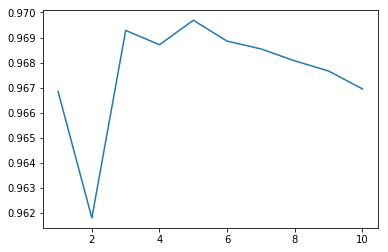

In [23]:
# 接下来我们研究k值的学习曲线
scores = []
x_ticks = [*range(1, 11)]
for i in range(1, 11):
    x_dir = decomposition.PCA(23).fit_transform(x)
    knn = neighbors.KNeighborsClassifier(i)
    score_mean = model_selection.cross_val_score(knn, x_dir, y, cv=5).mean()
    scores.append(score_mean)
plt.plot(x_ticks, scores)
print(max(scores), x_ticks[scores.index(max(scores))])
plt.show()

In [ ]:
# 定下超参数，看看最后效果如何
x_dir = decomposition.PCA(23).fit_transform(x)
knn = neighbors.KNeighborsClassifier(4)
model_selection.cross_val_score(knn, x_dir, y, cv=5).mean()